In [1]:
from matplotlib import pyplot
from numpy import where
import pandas as pd 
import os 
import json
import numpy as np
import pylab as plt
import time
import zipfile
import seaborn as sns
import random
from numba import jit

In [31]:
# Import data
bsm = pd.read_csv('features_14.csv')

In [32]:
bsm.dtypes

Target           int64
AccMeanX       float64
AccMeanY       float64
AccMeanZ       float64
AccCovX        float64
                ...   
GyroMedianY    float64
GyroMedianZ    float64
GyroStdX       float64
GyroStdY       float64
GyroStdZ       float64
Length: 61, dtype: object

In [33]:
bsm.head()

,Target,AccMeanX,AccMeanY,AccMeanZ,AccCovX,AccCovY,AccCovZ,AccSkewX,AccSkewY,AccSkewZ,...,GyroMaxZ,GyroVarX,GyroVarY,GyroVarZ,GyroMedianX,GyroMedianY,GyroMedianZ,GyroStdX,GyroStdY,GyroStdZ
0,1,0.285339,-0.138611,-0.957764,0.022150,0.003975,0.001926,0.867594,-1.305868,-0.507254,...,0.832061,0.761120,0.184372,0.262859,-0.286260,4.251908,0.706107,0.872422,0.429385,0.512697
1,1,0.313477,-0.161670,-0.956250,0.020571,0.005640,0.001456,0.002474,-0.395088,-0.677572,...,0.832061,3.061080,0.585991,0.270340,0.335878,3.969466,0.587786,1.749594,0.765501,0.519942
2,1,0.325195,-0.158325,-0.950155,0.017281,0.004579,0.001388,-0.354212,-0.603657,-0.984635,...,0.832061,3.137076,0.552431,0.905518,-0.286260,3.832061,0.240458,1.771179,0.743257,0.951587
3,1,0.336565,-0.172468,-0.937640,0.015305,0.005216,0.002253,-0.655653,-0.152454,-0.040530,...,0.832061,2.809524,3.963056,0.893127,0.335878,3.969466,-0.106870,1.676163,1.990743,0.945054
4,1,0.337860,-0.164185,-0.941681,0.013132,0.005020,0.002062,-0.718488,-0.446061,0.250539,...,0.832061,2.667567,3.414394,0.799787,-0.286260,4.038168,-0.179389,1.633269,1.847808,0.894308


In [34]:
print(bsm)

      Target  AccMeanX  AccMeanY  AccMeanZ   AccCovX   AccCovY   AccCovZ  \
0          1  0.285339 -0.138611 -0.957764  0.022150  0.003975  0.001926   
1          1  0.313477 -0.161670 -0.956250  0.020571  0.005640  0.001456   
2          1  0.325195 -0.158325 -0.950155  0.017281  0.004579  0.001388   
3          1  0.336565 -0.172468 -0.937640  0.015305  0.005216  0.002253   
4          1  0.337860 -0.164185 -0.941681  0.013132  0.005020  0.002062   
...      ...       ...       ...       ...       ...       ...       ...   
1097       4  0.273228 -0.094552 -0.983939  0.055210  0.034427  0.002588   
1098       4  0.264683 -0.092791 -0.976266  0.050594  0.033875  0.001917   
1099       4  0.257098 -0.091030 -0.976039  0.047140  0.033445  0.001903   
1100       4  0.257132 -0.091047 -0.978446  0.047143  0.033445  0.002054   
1101       4  0.255580 -0.094744 -0.980190  0.047636  0.032625  0.002090   

      AccSkewX  AccSkewY  AccSkewZ  ...  GyroMaxZ  GyroVarX  GyroVarY  \
0     0.867594

In [35]:
bsm = bsm.dropna()
# or:  bsm.dropna(inplace = True)
bsm.head()

,Target,AccMeanX,AccMeanY,AccMeanZ,AccCovX,AccCovY,AccCovZ,AccSkewX,AccSkewY,AccSkewZ,...,GyroMaxZ,GyroVarX,GyroVarY,GyroVarZ,GyroMedianX,GyroMedianY,GyroMedianZ,GyroStdX,GyroStdY,GyroStdZ
0,1,0.285339,-0.138611,-0.957764,0.022150,0.003975,0.001926,0.867594,-1.305868,-0.507254,...,0.832061,0.761120,0.184372,0.262859,-0.286260,4.251908,0.706107,0.872422,0.429385,0.512697
1,1,0.313477,-0.161670,-0.956250,0.020571,0.005640,0.001456,0.002474,-0.395088,-0.677572,...,0.832061,3.061080,0.585991,0.270340,0.335878,3.969466,0.587786,1.749594,0.765501,0.519942
2,1,0.325195,-0.158325,-0.950155,0.017281,0.004579,0.001388,-0.354212,-0.603657,-0.984635,...,0.832061,3.137076,0.552431,0.905518,-0.286260,3.832061,0.240458,1.771179,0.743257,0.951587
3,1,0.336565,-0.172468,-0.937640,0.015305,0.005216,0.002253,-0.655653,-0.152454,-0.040530,...,0.832061,2.809524,3.963056,0.893127,0.335878,3.969466,-0.106870,1.676163,1.990743,0.945054
4,1,0.337860,-0.164185,-0.941681,0.013132,0.005020,0.002062,-0.718488,-0.446061,0.250539,...,0.832061,2.667567,3.414394,0.799787,-0.286260,4.038168,-0.179389,1.633269,1.847808,0.894308


In [36]:
bsm.describe()

,Target,AccMeanX,AccMeanY,AccMeanZ,AccCovX,AccCovY,AccCovZ,AccSkewX,AccSkewY,AccSkewZ,...,GyroMaxZ,GyroVarX,GyroVarY,GyroVarZ,GyroMedianX,GyroMedianY,GyroMedianZ,GyroStdX,GyroStdY,GyroStdZ
count,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,...,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000
mean,2.490018,0.250681,-0.094582,-0.983306,0.029196,0.030323,0.009583,-0.112822,-0.099898,-0.186448,...,13.362845,11.155935,10.381491,114.428756,-0.735789,4.211808,1.109295,3.142812,3.034641,8.206899
std,1.050665,0.080183,0.091875,0.026849,0.022935,0.022036,0.006485,0.698375,1.056449,0.892163,...,16.113840,7.374181,7.085781,115.341708,0.844474,0.844673,1.514056,1.131295,1.083287,6.864279
min,1.000000,0.019642,-0.309535,-1.053659,0.000042,0.000070,0.000118,-2.694572,-3.429108,-3.073868,...,0.832061,0.053027,0.030970,0.026300,-4.061069,-0.736641,-15.675573,0.230276,0.175983,0.162173
25%,2.000000,0.196429,-0.166037,-1.003257,0.012777,0.007605,0.004619,-0.558205,-0.866926,-0.781039,...,2.389313,5.376291,5.239952,1.246986,-1.084924,3.779580,0.759542,2.318683,2.289094,1.116685
50%,3.000000,0.254752,-0.114406,-0.984262,0.022769,0.031239,0.008100,-0.135493,-0.123392,-0.124783,...,4.625954,9.686863,8.728437,127.534036,-0.660305,4.297710,1.019084,3.112373,2.954393,11.293095
75%,3.000000,0.309457,-0.007616,-0.964587,0.034529,0.045968,0.012561,0.205514,0.774952,0.350263,...,32.601145,14.986955,13.725827,217.342978,-0.347328,4.747137,1.427481,3.871299,3.704838,14.742556
max,4.000000,0.445452,0.114851,-0.900652,0.109354,0.094144,0.030886,3.321394,2.504595,3.356136,...,45.442748,39.778734,35.373877,379.616823,3.358779,6.500000,9.721374,6.307038,5.947594,19.483758


In [37]:
bsm.columns

Index(['Target', 'AccMeanX', 'AccMeanY', 'AccMeanZ', 'AccCovX', 'AccCovY',
       'AccCovZ', 'AccSkewX', 'AccSkewY', 'AccSkewZ', 'AccKurtX', 'AccKurtY',
       'AccKurtZ', 'AccSumX', 'AccSumY', 'AccSumZ', 'AccMinX', 'AccMinY',
       'AccMinZ', 'AccMaxX', 'AccMaxY', 'AccMaxZ', 'AccVarX', 'AccVarY',
       'AccVarZ', 'AccMedianX', 'AccMedianY', 'AccMedianZ', 'AccStdX',
       'AccStdY', 'AccStdZ', 'GyroMeanX', 'GyroMeanY', 'GyroMeanZ', 'GyroCovX',
       'GyroCovY', 'GyroCovZ', 'GyroSkewX', 'GyroSkewY', 'GyroSkewZ',
       'GyroSumX', 'GyroSumY', 'GyroSumZ', 'GyroKurtX', 'GyroKurtY',
       'GyroKurtZ', 'GyroMinX', 'GyroMinY', 'GyroMinZ', 'GyroMaxX', 'GyroMaxY',
       'GyroMaxZ', 'GyroVarX', 'GyroVarY', 'GyroVarZ', 'GyroMedianX',
       'GyroMedianY', 'GyroMedianZ', 'GyroStdX', 'GyroStdY', 'GyroStdZ'],
      dtype='object')

In [38]:
bsm.dtypes

Target           int64
AccMeanX       float64
AccMeanY       float64
AccMeanZ       float64
AccCovX        float64
                ...   
GyroMedianY    float64
GyroMedianZ    float64
GyroStdX       float64
GyroStdY       float64
GyroStdZ       float64
Length: 61, dtype: object

In [39]:
# Number of lines in the dataset
len(bsm)

1102

In [133]:
# Number of normal vehicles (0) and number of attackers (13) in the dataset
bsm.Target = bsm.Target - 1

# Classification

In [248]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import confusion_matrix, classification_report, average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


pd.set_option("display.max_columns", None)

In [263]:
from onedal.svm import SVC
from onedal.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from nltk import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import numpy as np



def classification_attack(method,veremi):
       
    # Our labels are 0 or 13; we need 0-1 for classification algorithms. Convert 13 to 1
    veremi['Target'] = veremi['Target'].replace(13,1)
    
    # Create feature set X and label set y 
    y = veremi['Target']
    X = veremi.drop(columns=['Target', 'AccMeanX', 'AccMeanY', 'AccMeanZ', 'AccCovX', 'AccCovY','AccCovZ', 'AccSkewX', 'AccSkewY', 'AccSkewZ'], axis=1)

# Data split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0, stratify=y)
    y_prob = None
    
    if method=='XGB':
        # XGBoost
        xgb = XGBClassifier(random_state=0)

        start = time.time()
        xgb.fit(X_train,y_train)
        timefit = time.time() - start

        start = time.time()
        y_pred = xgb.predict(X_test)
        y_prob = xgb.predict_proba(X_test)
        timepred = time.time() - start
        
    elif method == 'KNN':
        # KNN
        knn = KNeighborsClassifier()

        start = time.time()
        knn.fit(X_train,y_train)
        timefit = time.time() - start

        start = time.time()
        y_pred = knn.predict(X_test)
        y_prob = knn.predict_proba(X_test)
        timepred = time.time() - start
        
    elif method == 'LR':
        # Logistic Regression
        lr = LogisticRegression(random_state=0)

        start = time.time()
        lr.fit(X_train,y_train)
        timefit = time.time() - start

        start = time.time()
        y_pred = lr.predict(X_test)
        y_prob = lr.predict_proba(X_test)
        timepred = time.time() - start
    elif method == 'SVM':
        # SVM
        svm = SVC(random_state=0)

        start = time.time()
        svm.fit(X_train,y_train)
        timefit = time.time() - start

        start = time.time()
        y_pred = svm.predict(X_test)
        timepred = time.time() - start

       
    report = classification_report(y_test,y_pred,output_dict=True)
    auc_score = average_precision_score(y_test, y_prob) if not(y_prob is None) else None
    
    return(report['accuracy'], report['weighted avg']['precision'], report['weighted avg']['recall'], 
          report['weighted avg']['f1-score'], auc_score, timefit, timepred)

In [264]:
import pandas as pd
results_classifying = pd.DataFrame(index=['XGB','KNN', 'LR', 'SVM'],columns=['Acc','Pre','Rec','F1s', 'AUC', 'TimeFit','TimePred'])

In [265]:
results_classifying.xs('XGB')[:] = classification_attack('XGB',bsm) 
results_classifying.xs('KNN')[:] = classification_attack('KNN',bsm) 
results_classifying.xs('LR')[:] = classification_attack('LR',bsm)
results_classifying.xs('SVM')[:] = classification_attack('SVM',bsm)

results_classifying.to_excel('results_classifying.xlsx')

d:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [266]:
results_classifying

,Acc,Pre,Rec,F1s,AUC,TimeFit,TimePred
XGB,0.995475,0.995564,0.995475,0.995481,1.0,0.150305,0.013108
KNN,0.959276,0.95978,0.959276,0.959317,0.986184,0.001002,0.005009
LR,0.968326,0.969059,0.968326,0.968398,0.976272,0.028997,0.003232
SVM,0.832579,0.857919,0.832579,0.838029,None,0.009024,0.003639


In [182]:
# Storage of the data
bsm.to_csv('bsm.csv')

In [183]:
bsm_copy = pd.read_csv('bsm.csv')
bsm_copy.head()

,Unnamed: 0,Target,AccMeanX,AccMeanY,AccMeanZ,AccCovX,AccCovY,AccCovZ,AccSkewX,AccSkewY,AccSkewZ,AccKurtX,AccKurtY,AccKurtZ,AccSumX,AccSumY,AccSumZ,AccMinX,AccMinY,AccMinZ,AccMaxX,AccMaxY,AccMaxZ,AccVarX,AccVarY,AccVarZ,AccMedianX,AccMedianY,AccMedianZ,AccStdX,AccStdY,AccStdZ,GyroMeanX,GyroMeanY,GyroMeanZ,GyroCovX,GyroCovY,GyroCovZ,GyroSkewX,GyroSkewY,GyroSkewZ,GyroSumX,GyroSumY,GyroSumZ,GyroKurtX,GyroKurtY,GyroKurtZ,GyroMinX,GyroMinY,GyroMinZ,GyroMaxX,GyroMaxY,GyroMaxZ,GyroVarX,GyroVarY,GyroVarZ,GyroMedianX,GyroMedianY,GyroMedianZ,GyroStdX,GyroStdY,GyroStdZ
0,0,0,0.285339,-0.138611,-0.957764,0.022150,0.003975,0.001926,0.867594,-1.305868,-0.507254,-1.164806,1.239840,-0.761065,1.141357,-0.554443,-3.831055,0.162598,-0.226807,-1.013184,0.480225,-0.08667,-0.911621,0.022150,0.003975,0.001926,0.249268,-0.120483,-0.953125,0.148827,0.063049,0.043889,-0.177481,4.190840,0.498092,0.761120,0.184372,0.262859,0.225352,-0.338028,-1.727183,-0.709924,16.763359,1.992366,-4.710496,-4.035868,2.914796,-0.923664,3.694656,-0.251908,0.786260,4.564885,0.832061,0.761120,0.184372,0.262859,-0.286260,4.251908,0.706107,0.872422,0.429385,0.512697
1,1,0,0.313477,-0.161670,-0.956250,0.020571,0.005640,0.001456,0.002474,-0.395088,-0.677572,-2.649441,-2.649803,0.636762,1.567383,-0.808350,-4.781250,0.162598,-0.253906,-1.013184,0.480225,-0.08667,-0.911621,0.020571,0.005640,0.001456,0.322754,-0.140381,-0.950195,0.143425,0.075100,0.038159,0.528244,3.891603,0.377099,3.061080,0.585991,0.270340,1.282080,-1.069372,-0.501530,2.641221,19.458015,1.885496,1.633018,0.846742,-2.932893,-0.923664,2.694656,-0.251908,3.351145,4.564885,0.832061,3.061080,0.585991,0.270340,0.335878,3.969466,0.587786,1.749594,0.765501,0.519942
2,2,0,0.325195,-0.158325,-0.950155,0.017281,0.004579,0.001388,-0.354212,-0.603657,-0.984635,-1.819232,-1.472251,0.663006,1.951172,-0.949951,-5.700928,0.162598,-0.253906,-1.013184,0.480225,-0.08667,-0.911621,0.017281,0.004579,0.001388,0.353271,-0.140991,-0.943481,0.131455,0.067669,0.037253,0.189567,3.773537,0.038168,3.137076,0.552431,0.905518,1.309765,-0.378864,-1.302740,1.137405,22.641221,0.229008,1.663170,-1.192246,1.540639,-1.503817,2.694656,-1.656489,3.351145,4.564885,0.832061,3.137076,0.552431,0.905518,-0.286260,3.832061,0.240458,1.771179,0.743257,0.951587
3,3,0,0.336565,-0.172468,-0.937640,0.015305,0.005216,0.002253,-0.655653,-0.152454,-0.040530,-1.214712,-2.185485,0.666209,2.355957,-1.207275,-6.563477,0.162598,-0.257324,-1.013184,0.480225,-0.08667,-0.862549,0.015305,0.005216,0.002253,0.383789,-0.141602,-0.936768,0.123715,0.072222,0.047465,0.356598,4.480916,-0.102508,2.809524,3.963056,0.893127,0.861002,2.009707,-0.667798,2.496183,31.366412,-0.717557,0.434190,4.642007,-0.680104,-1.503817,2.694656,-1.656489,3.351145,8.725191,0.832061,2.809524,3.963056,0.893127,0.335878,3.969466,-0.106870,1.676163,1.990743,0.945054
4,4,0,0.337860,-0.164185,-0.941681,0.013132,0.005020,0.002062,-0.718488,-0.446061,0.250539,-0.666622,-1.909540,0.556116,2.702881,-1.313477,-7.533447,0.162598,-0.257324,-1.013184,0.480225,-0.08667,-0.862549,0.013132,0.005020,0.002062,0.365356,-0.140991,-0.943481,0.114596,0.070850,0.045406,0.176527,4.434160,-0.167939,2.667567,3.414394,0.799787,1.072055,2.151158,-0.388248,1.412214,35.473282,-1.343511,0.737750,5.422661,-0.817133,-1.503817,2.694656,-1.656489,3.351145,8.725191,0.832061,2.667567,3.414394,0.799787,-0.286260,4.038168,-0.179389,1.633269,1.847808,0.894308


# Clustering

In [184]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report
from sklearn.metrics import homogeneity_score, completeness_score
from sklearn.preprocessing import StandardScaler

In [202]:
def clustering_attack(method,veremi):
    
    
     # Our labels are 0 or 13; we need 0-1 for classification algorithms. Convert 13 to 1
    veremi['Target'] = veremi['Target'].replace(13,1)
    
    # Create feature set X and label set y 
    y = veremi['Target']
    X = veremi.drop(columns=['Target', 'AccMeanX', 'AccMeanY', 'AccMeanZ', 'AccCovX', 'AccCovY','AccCovZ', 'AccSkewX', 'AccSkewY', 'AccSkewZ'], axis=1)
       
    
    # Data split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0, stratify=y)
    
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.fit_transform(X_test)
             
    if method=='kMeans':
        # k-Means
        kmeans = KMeans(n_clusters=4, random_state=0)
        
        start = time.time()
        kmeans.fit(scaled_X_train)
        timefit = time.time() - start

        start = time.time()
        y_pred = kmeans.predict(scaled_X_test)
        timepred = time.time() - start
    
    elif method=='GMM':
        # Gaussian Mixture Model
        gmm = GaussianMixture(n_components=4, random_state=0)

        start = time.time()
        gmm.fit(scaled_X_train)
        timefit = time.time() - start

        start = time.time()
        y_pred = gmm.predict(scaled_X_test)
        timepred = time.time() - start
           
    report = classification_report(y_test, y_pred, output_dict=True)

    return(report['accuracy'], report['weighted avg']['precision'], report['weighted avg']['recall'], 
          report['weighted avg']['f1-score'], timefit, timepred)

## Outputs and Stockage

In [203]:
results_cluster = pd.DataFrame(index=['kMeans','GMM'],
                       columns=['Acc','Pre','Rec','F1s','TimeFit','TimePred'])

In [204]:
results_cluster.xs('kMeans')[:] = clustering_attack('kMeans',bsm)
results_cluster.xs('GMM')[:] = clustering_attack('GMM',bsm)



results_cluster.to_excel('results_cluster.xlsx')

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[3 3 0 1 2 3 3 1 1 3 2 3 2 2 2 2 3 2 2 3 1 3 3 3 1 2 3 0 3 0 3 3 2 1 3 3 0
 1 1 1 3 1 1 3 2 1 3 3 1 3 3 3 2 3 1 1 1 3 2 3 3 2 2 3 1 2 1 2 3 2 1 1 2 1
 1 1 3 0 3 1 2 2 2 3 3 3 3 1 1 1 1 2 2 1 3 3 1 2 3 1 1 3 2 1 2 3 3 3 2 2 3
 1 1 2 2 1 3 2 2 0 2 3 1 2 3 2 3 3 3 3 3 3 0 3 2 3 1 1 2 1 2 3 2 2 0 1 2 3
 3 3 0 2 0 2 2 1 0 3 3 3 2 3 1 2 3 3 1 3 2 2 3 2 3 3 3 2 3 2 3 3 3 1 1 2 2
 3 3 1 1 1 1 3 3 3 3 1 1 2 3 3 2 3 0 3 3 2 3 2 2 3 0 2 1 3 3 3 0 1 1 2 2]
[3 3 3 1 2 3 3 1 1 3 2 3 2 2 2 2 2 2 2 3 1 3 3 3 1 2 3 0 3 0 3 3 3 1 3 3 0
 1 1 1 3 1 1 3 2 1 3 3 1 3 3 3 2 3 1 1 1 3 2 3 3 2 2 3 1 2 1 2 3 2 1 1 2 1
 1 1 3 3 3 1 2 2 2 3 3 3 3 1 1 1 1 2 2 1 3 3 1 2 3 1 1 3 2 1 2 3 3 3 2 2 3
 1 1 2 2 1 3 2 2 3 2 3 1 2 3 2 3 3 3 3 3 3 0 3 2 3 1 1 2 1 2 2 2 2 3 1 2 3
 3 3 3 2 3 2 2 1 0 3 3 3 2 3 1 2 3 3 1 3 2 2 3 2 3 3 3 2 3 2 3 3 3 1 1 2 2
 3 3 1 1 1 1 3 3 3 3 1 1 2 3 3 2 3 3 3 3 2 3 2 2 3 0 2 1 3 3 3 0 1 1 2 2]


d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [205]:
results_cluster

,Acc,Pre,Rec,F1s,TimeFit,TimePred
kMeans,0.669683,0.653755,0.669683,0.640209,0.652763,0.056781
GMM,0.683258,0.655624,0.683258,0.640825,0.111641,0.001003


# Visualization

In [189]:
bsm['Target'] = bsm['Target'].replace(13,1)
y = bsm['Target']
X = bsm.drop(columns=['Target', 'AccMeanX', 'AccMeanY', 'AccMeanZ', 'AccCovX', 'AccCovY','AccCovZ', 'AccSkewX', 'AccSkewY', 'AccSkewZ'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0, stratify=y)

In [190]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred0 = xgb.predict(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)


lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred2 = lr.predict(X_test)

svm = SVC()
svm.fit(X_train,y_train)
y_pred3 = svm.predict(X_test)

d:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Confusion Matrix

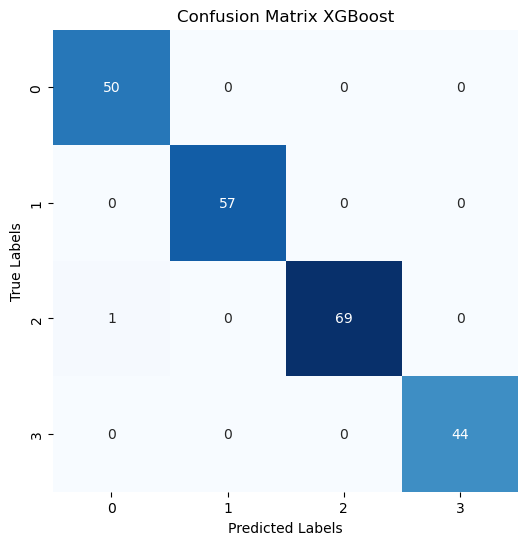

In [175]:
cm1 = confusion_matrix(y_test, y_pred0)

fig, ax = plt.subplots(figsize=(6,6)) 
sns.heatmap(cm1, annot=True, cbar=False, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix XGBoost')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

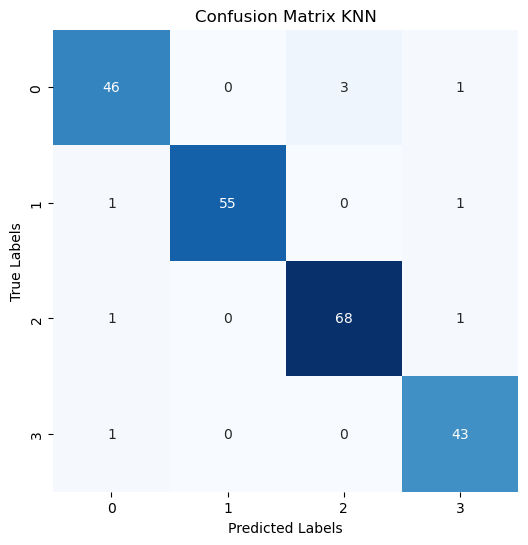

In [192]:
cm1 = confusion_matrix(y_test, y_pred1)

fig, ax = plt.subplots(figsize=(6,6)) 
sns.heatmap(cm1, annot=True, cbar=False, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

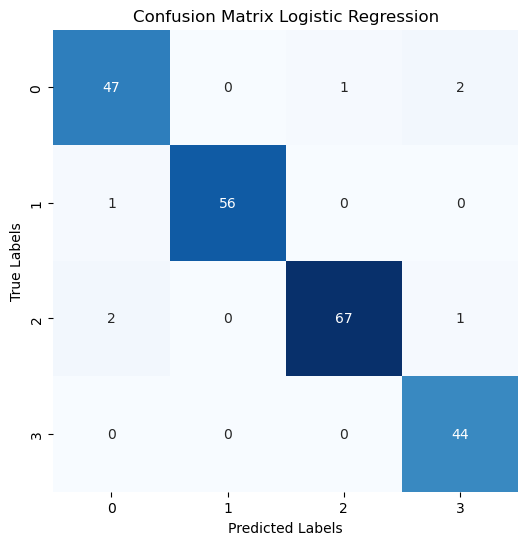

In [177]:
cm2 = confusion_matrix(y_test, y_pred2)

fig, ax = plt.subplots(figsize=(6,6)) 
sns.heatmap(cm2, annot=True, cbar=False, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

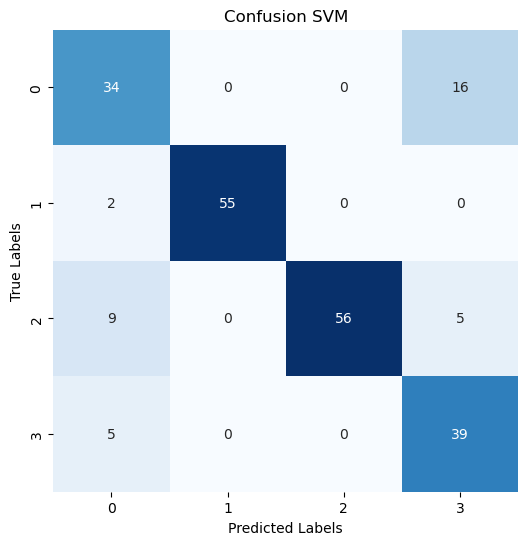

In [191]:
cm3 = confusion_matrix(y_test, y_pred3)

fig, ax = plt.subplots(figsize=(6,6)) 
sns.heatmap(cm3, annot=True, cbar=False, cmap='Blues', fmt='.0f')
ax.set_title('Confusion SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [162]:
xgb = XGBClassifier(eval_metric = ['auc', 'merror'])

eval_set0 = [(X_train, y_train), (X_test, y_test)]

xgb.fit(X_train, y_train, eval_set=eval_set0, verbose=True)

[0]	validation_0-auc:0.99996	validation_0-merror:0.00341	validation_1-auc:0.99838	validation_1-merror:0.02715
[1]	validation_0-auc:1.00000	validation_0-merror:0.00341	validation_1-auc:0.99961	validation_1-merror:0.01357
[2]	validation_0-auc:1.00000	validation_0-merror:0.00000	validation_1-auc:0.99969	validation_1-merror:0.01357


[3]	validation_0-auc:1.00000	validation_0-merror:0.00000	validation_1-auc:0.99986	validation_1-merror:0.01357
[4]	validation_0-auc:1.00000	validation_0-merror:0.00000	validation_1-auc:0.99989	validation_1-merror:0.01357
[5]	validation_0-auc:1.00000	validation_0-merror:0.00000	validation_1-auc:0.99989	validation_1-merror:0.00905
[6]	validation_0-auc:1.00000	validation_0-merror:0.00000	validation_1-auc:0.99991	validation_1-merror:0.00905
[7]	validation_0-auc:1.00000	validation_0-merror:0.00000	validation_1-auc:0.99994	validation_1-merror:0.00905
[8]	validation_0-auc:1.00000	validation_0-merror:0.00000	validation_1-auc:0.99997	validation_1-merror:0.00905
[9]	validation_0-auc:1.00000	validation_0-merror:0.00000	validation_1-auc:0.99997	validation_1-merror:0.00905
[10]	validation_0-auc:1.00000	validation_0-merror:0.00000	validation_1-auc:0.99997	validation_1-merror:0.00905
[11]	validation_0-auc:1.00000	validation_0-merror:0.00000	validation_1-auc:0.99997	validation_1-merror:0.00905
[12]	val

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['auc', 'merror'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [164]:
results = xgb.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

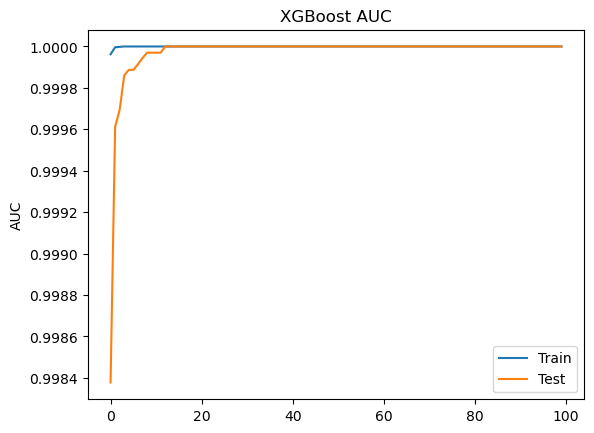

In [165]:
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
pyplot.ylabel('AUC')
pyplot.title('XGBoost AUC')
pyplot.show()

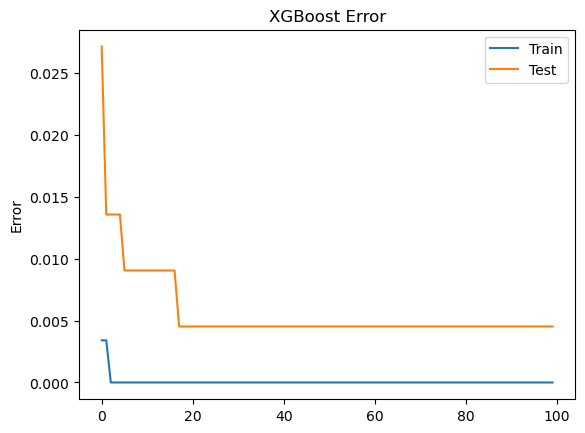

In [167]:
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
pyplot.ylabel('Error')
pyplot.title('XGBoost Error')
pyplot.show()